Kernel fucntions are transforamtion mapping lower dimention al space to higher dim in order to make linear seperation simpler in classification and clusttering tasks.

Some Kernel matrix could be large and so qc could come in handy

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
# pip install bloch-sphere -----> very goo for visualisaing rotations, check out later

import os

c:\Users\BenjaminAtadana\YandexDisk\MY_FILES\School_Side_Works\Quantum_Computing_notes


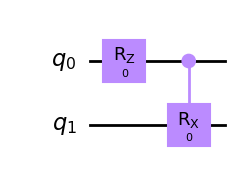

In [2]:
theta = Parameter('0') # defines the parameter to tune
qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crx(theta, 0, 1)
qc.draw('mpl')


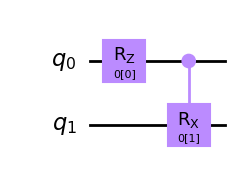

In [3]:
theta_list = ParameterVector('0', length=2) # defines the parameter vector for more than 1 parameter with lenght equal to the Qubit number
qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crx(theta_list[1], 0, 1)
qc.draw('mpl')

Properties of Parameterized QC.

Expresibility: Covrerage of Hilbert space by circuits hypothesis space
Example explained below


Entanglement: The Meyer-Wallach measure measures the degree of entanglement in qubits [0-1]
A circuit with single gates has a measure of 0 while a circuit with several 2/more gates can generate circuits with enataglement and have a measure of > 0. 

Hardware efficiency
In this era of near term quantum computing, where devices have limited qubit
connectivity:When building a real quantum computer, depending on how we build it, we might not be able to interact each qubit (e.g. through a CNOT gate) directly. If we can interact two qubits directly, we say they are connected.

coherence times:This is the time it takes for a quantum system to stop being 'coherent' with itself, meaning we can't interfere it with itself any more.

and gate fidelities, the depth of the circuits we run directly affects the accuracy of our results, since there is limited error correction or mitigation.



In quantum machine learning, parameterized quantum circuits tend to be used for two things:

To encode data, where the parameters are determined by the data being encoded
As a quantum model, where the parameters are determined by an optimization process.e

In [11]:
# EXPRESSIBILITY

import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]


# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)

# Circuit C
qc_C = QuantumCircuit(1)
qc_C.h(0)
qc_C.ry(theta_param, 0)

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*pi*np.random.uniform() for i in range(num_param)]
phi = [2*pi*np.random.uniform() for i in range(num_param)]

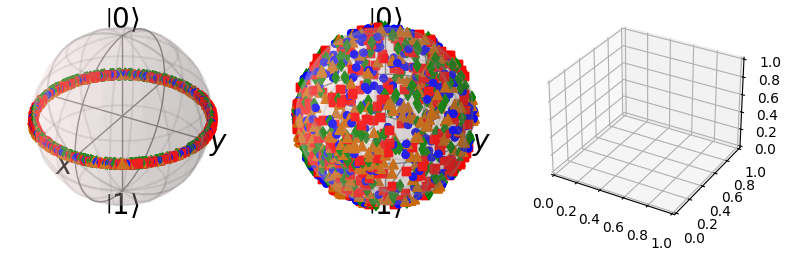

In [12]:
# EXPRESSIBILITY

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2, ax3 = fig.add_subplot(1, 3, 1, projection='3d'), fig.add_subplot(1, 3, 2, projection='3d'), fig.add_subplot(1, 3, 3, projection='3d')
b1,b2,b3 = Bloch(axes=ax1), Bloch(axes=ax2), Bloch(axes=ax3)

# b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
# b1.point_marker, b2.point_marker= ['o'],['o']
# b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    # state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i]}))
    # state_3=Statevector.from_instruction(qc_C.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))
    # b3.add_points(state_to_bloch(state_3))

b1.show()
b2.show()
# b3.show()

# DATA ENCODING/ data embeddding/data loading
Meaning how to represent the data on a qc


In [52]:

import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3, 3)
qc.initialize(desired_state, [0,1,2])
qc.measure(range(3) ,range(3))
# qc.decompose().draw('mpl')
#qc.decompose().decompose().decompose().decompose().decompose().draw('mpl')

from qiskit import Aer
backend = Aer.get_backend('aer_simulator')
backend.run(qc).result().get_counts()


{'101': 487, '111': 537}

In [18]:
qc.measure()

8

In todays near-term devices, we will look at ml algorithms that can be run on todays noisy computers.
- Variational Models: Quantum circuit with parameters that can be trained and tweaked
    such a parameterised qc is also called and ansatz or a variational model
Fault tolerance qcom is an ideal case of no-noise.

ENCODING DATA
 - BASIS ENCODING
<div style="float: left; margin-left: 40px;">
<img src="./qml_images/qml_baseEncoding.png" alt="" width="400" height="240">
</div>
<div>
       <p>
       - AMPLITUDE ENCODING
              Given a sample x1 = [0.8, 0.1, 0, 0.1] the idea is to have a q-circuit that outputs [0.8, 0.1, 0, 0.1] as the amplitudes of the initialised states. In this case 2 qubits are used since the possilbe states are [00, 01, 10, 11].Of course x1 would have to be normalised. If dim(x1) = (1,8) then 3 qubits would be needed to encode these.
       </p>
       <div style="float: left; margin-left: 40px;">
              <img src="./qml_images/qml_amplitudeEncoding.png" alt="" width="400" height="240">
       </div>
       <p>
       - ANGLE ENCODING
              Encoding data by rotating N qubits in angles according to the features of an N-dim data sample. if x1=[pi, pi/2], Then 2 qubits would be rotated(x, z, y) in pi and pi/2 respectively.
       </p>
       <div style="float: left; margin-left: 40px;">
              <img src="./qml_images/qml_angleEncoding.png" alt="" width="400" height="240">
       </div>
       <p>Remember a qubit is rotated according to each feature.
       The first cos and sin are on a single qubit.
       But then a unitary is required to keep things normalised
       The unitary just happened to be a Y-rotation on a single qubit in this case. It could have been the Z-rotation
       </p>
       <p>
       - HIGHER ORDER ENCODING
              Similar to angle encoding in that the numbet of qubits needed equal the number of features of the sample. But the angle of rotation depends on the both the individual features on the qubits and the product of the features. The encoding block can be increased and determines the depth of the circuit.
       </p>
       <div style="float: left; margin-left: 40px;">
              <img src="./qml_images/qml_higherOrderEnc.png" alt="Higher Order Encoding" width="200" height="120">
       </div>
</div>


<h1>Variational Model</h1>
<img src="./qml_images/qml_variationalModel.png" alt="Variational model" width="200" height="120">

<p>- the is an endoing model</p>
<p>- encoded data fed to ansatz</p>
<p>- output obtained and intepreted the block can be increased to increase the number of parameters</p>

<h1>Extracting labels from the variational model</h1>
<p> 1. Parity post processing</p>
<img src="./qml_images/qml_extractingLabels.png" alt="Parity Postprocessing" width="200" height="120">
<p> consider 2 qubit system, even and odd parities added to result in a binary distribution</p>

<p> 2. Measuring First Qubit</p>
<img src="./qml_images/qml_measuringFirstQubit.png" alt="Measuring First Qubit" width="200" height="120">
<p> All info of rotations due to input data encoded in the variational model and so measuring the first qubit only translates to mapping such onto just one qubit measurement</p>

<h1>Optimisation</h1>
<img src="./qml_images/qml_gradients.png" alt="Measuring First Qubit" width="200" height="120">
<p>Shift parameters by +theta and measure then shift by -theta and measure</p>
<p> The gradient is the difference as shown </p>





